In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize


%matplotlib inline

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- unused column \ feature

In [5]:
df.drop('CUST_ID', inplace=True, axis=1)

- distribution of data

In [6]:
# sns.pairplot(df)

(array([8.379e+03, 1.530e+02, 4.200e+01, 2.300e+01, 1.500e+01, 6.000e+00,
        5.000e+00, 6.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.91630000e-02, 3.82032858e+03, 7.64063800e+03, 1.14609474e+04,
        1.52812568e+04, 1.91015663e+04, 2.29218757e+04, 2.67421851e+04,
        3.05624945e+04, 3.43828039e+04, 3.82031133e+04, 4.20234228e+04,
        4.58437322e+04, 4.96640416e+04, 5.34843510e+04, 5.73046604e+04,
        6.11249698e+04, 6.49452793e+04, 6.87655887e+04, 7.25858981e+04,
        7.64062075e+04]),
 <a list of 20 Patch objects>)

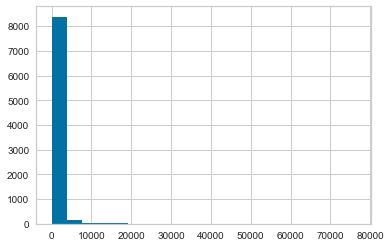

In [7]:
plt.hist(df['MINIMUM_PAYMENTS'],bins=20)

(array([2.234e+03, 2.349e+03, 1.060e+03, 1.035e+03, 8.140e+02, 5.120e+02,
        3.550e+02, 2.230e+02, 1.170e+02, 9.800e+01, 6.100e+01, 4.800e+01,
        1.900e+01, 1.400e+01, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([   50. ,  1547.5,  3045. ,  4542.5,  6040. ,  7537.5,  9035. ,
        10532.5, 12030. , 13527.5, 15025. , 16522.5, 18020. , 19517.5,
        21015. , 22512.5, 24010. , 25507.5, 27005. , 28502.5, 30000. ]),
 <a list of 20 Patch objects>)

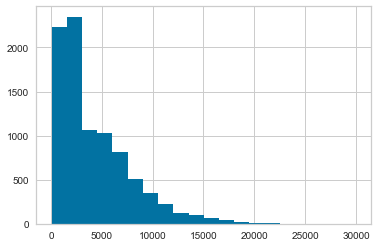

In [8]:
plt.hist(df['CREDIT_LIMIT'],bins=20)

- nan\ unique values

In [10]:
for col in df:
    print(f"{col} : {df[col].isnull().sum()}")

BALANCE : 0
BALANCE_FREQUENCY : 0
PURCHASES : 0
ONEOFF_PURCHASES : 0
INSTALLMENTS_PURCHASES : 0
CASH_ADVANCE : 0
PURCHASES_FREQUENCY : 0
ONEOFF_PURCHASES_FREQUENCY : 0
PURCHASES_INSTALLMENTS_FREQUENCY : 0
CASH_ADVANCE_FREQUENCY : 0
CASH_ADVANCE_TRX : 0
PURCHASES_TRX : 0
CREDIT_LIMIT : 1
PAYMENTS : 0
MINIMUM_PAYMENTS : 313
PRC_FULL_PAYMENT : 0
TENURE : 0


In [11]:
Nan_columns = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for col in df:
    df[col] = df[col].fillna(df[col].median())

-- double check

In [12]:
for col in df:
    print(f"{col} : {df[col].isnull().sum()}")

BALANCE : 0
BALANCE_FREQUENCY : 0
PURCHASES : 0
ONEOFF_PURCHASES : 0
INSTALLMENTS_PURCHASES : 0
CASH_ADVANCE : 0
PURCHASES_FREQUENCY : 0
ONEOFF_PURCHASES_FREQUENCY : 0
PURCHASES_INSTALLMENTS_FREQUENCY : 0
CASH_ADVANCE_FREQUENCY : 0
CASH_ADVANCE_TRX : 0
PURCHASES_TRX : 0
CREDIT_LIMIT : 0
PAYMENTS : 0
MINIMUM_PAYMENTS : 0
PRC_FULL_PAYMENT : 0
TENURE : 0


- Normalize data

In [13]:
df_normalized = pd.DataFrame(normalize(df))
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208886,0.000080,0.187872,0.187872,0.00000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939987,0.000000,0.039147,0.00000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [14]:
def choose_k(df_normalized):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df_normalized)        
    visualizer.show()

In [15]:
def Kmeans(df_normalized,k):
    kmeans = KMeans(k)
    kmeans.fit(df_normalized)
    df_normalized["kmeans"] = kmeans.labels_
    score_KMeans = silhouette_score(df_normalized, df_normalized["kmeans"], metric='euclidean')
    return score_KMeans

In [16]:
def choose_component(df_normalized,component):
    pca = PCA(n_components=component)
    PCA_transform = pca.fit_transform(df_normalized)
    PCA_df = pd.DataFrame(data = PCA_transform)
    return PCA_df



### 1) KMeans without PCA

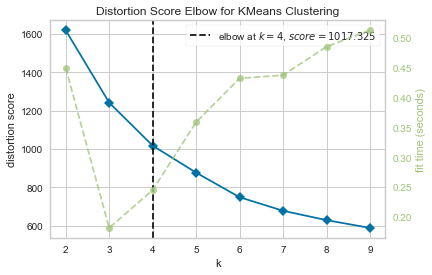

In [17]:
choose_k(df_normalized)

In [18]:
score_KMeans = Kmeans(df_normalized,4)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.6543043100367789


In [19]:
# kmeans = KMeans(4)
# kmeans.fit(df_normalized)
# df_normalized["kmeans"] = kmeans.labels_
# score_KMeans = silhouette_score(df_normalized, df_normalized["kmeans"], metric='euclidean')
# print(f"KMeans cluster score : {score_KMeans}")

### 2) KMeans with PCA

In [20]:
KMeans_Scores = []

- number of components = 3

In [21]:
PCA_df = choose_component(df_normalized,3)
PCA_df

,0,1,2
0,-0.473762,-0.264981,0.067259
1,1.610781,0.090535,0.246746
2,-0.446314,-0.252821,-0.162733
3,-0.469701,-0.280377,-0.097006
4,0.569974,0.047788,-0.130629
...,...,...,...
8945,-0.501582,-0.117725,0.163109
8946,-0.492683,-0.083557,0.047386
8947,-0.484639,-0.330121,0.054732
8948,-0.451775,-0.362749,0.062341


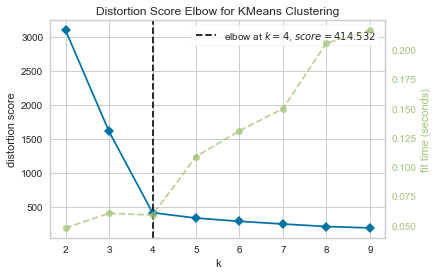

In [22]:
choose_k(PCA_df)

In [23]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.8591612302980238


- number of components = 4

In [24]:
PCA_df = choose_component(df_normalized,4)
PCA_df

,0,1,2,3
0,-0.473762,-0.264981,0.067259,0.141549
1,1.610781,0.090535,0.246746,-0.084013
2,-0.446314,-0.252821,-0.162733,-0.073995
3,-0.469701,-0.280377,-0.097006,-0.134401
4,0.569974,0.047788,-0.130629,0.061213
...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228
8946,-0.492683,-0.083557,0.047386,0.232504
8947,-0.484639,-0.330121,0.054732,0.093900
8948,-0.451775,-0.362749,0.062341,0.093623


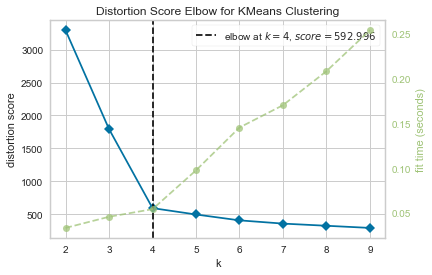

In [25]:
choose_k(PCA_df)

In [26]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.8315262819645809


- number of components = 5

In [27]:
PCA_df = choose_component(df_normalized,5)
PCA_df

,0,1,2,3,4
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131
1,1.610781,0.090535,0.246746,-0.084013,0.032208
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321
4,0.569974,0.047788,-0.130629,0.061213,-0.305851
...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195


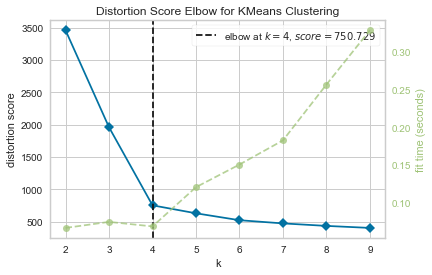

In [28]:
choose_k(PCA_df)

In [29]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.8124726598881508


number of components = 6

In [30]:
PCA_df = choose_component(df_normalized,6)
PCA_df

,0,1,2,3,4,5
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605
...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152


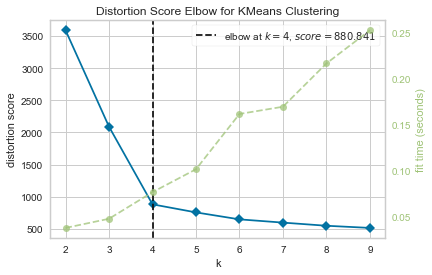

In [31]:
choose_k(PCA_df)

In [32]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7938140430816137


number of components = 7

In [33]:
PCA_df = choose_component(df_normalized,7)
PCA_df

,0,1,2,3,4,5,6
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117
...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984


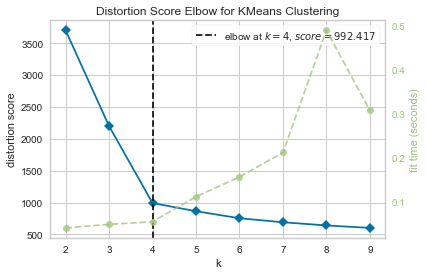

In [34]:
choose_k(PCA_df)

In [35]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7654740277341239


number of components = 8

In [36]:
PCA_df = choose_component(df_normalized,8)
PCA_df

,0,1,2,3,4,5,6,7
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576
...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117


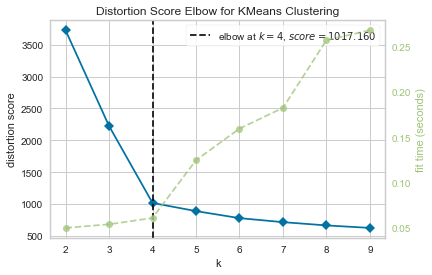

In [37]:
choose_k(PCA_df)

In [38]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7738085379003011


number of components = 9

In [39]:
PCA_df = choose_component(df_normalized,9)
PCA_df

,0,1,2,3,4,5,6,7,8
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407
...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586


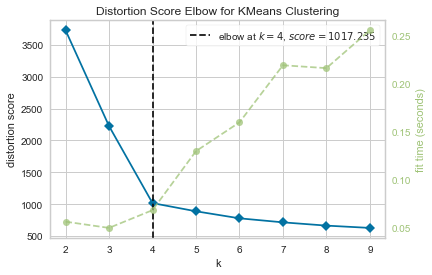

In [40]:
choose_k(PCA_df)

In [41]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.773672104014118


number of components = 10

In [42]:
PCA_df = choose_component(df_normalized,10)
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724
...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565


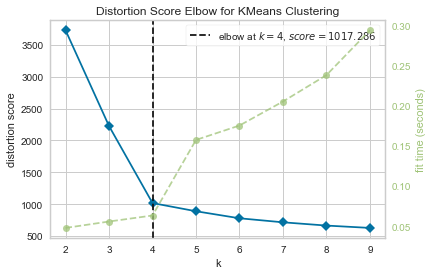

In [43]:
choose_k(PCA_df)

In [44]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7738042496751316


number of components = 11

In [45]:
PCA_df = choose_component(df_normalized,11)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066
...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100


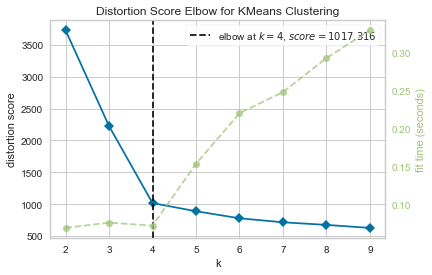

In [46]:
choose_k(PCA_df)

In [47]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7786646372075574


number of components = 12

In [48]:
PCA_df = choose_component(df_normalized,12)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170,-0.000916
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033,-0.001657
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037,0.000005
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071,0.000099
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066,-0.000761
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252,-0.000088
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219,-0.000130
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170,-0.000178
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100,0.002680


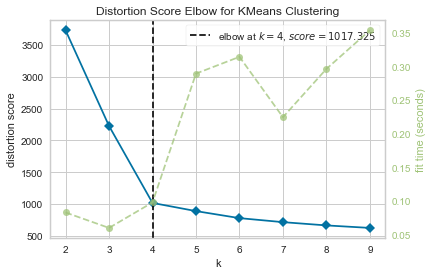

In [49]:
choose_k(PCA_df)

In [50]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7737822826689598


number of components = 13

In [51]:
PCA_df = choose_component(df_normalized,13)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170,-0.000916,0.000243
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033,-0.001657,-0.000009
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037,0.000005,-0.000038
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071,0.000099,0.000015
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066,-0.000761,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252,-0.000088,-0.000892
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219,-0.000130,-0.000726
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170,-0.000178,-0.000761
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100,0.002680,-0.000201


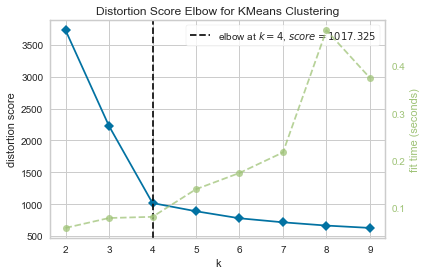

In [52]:
choose_k(PCA_df)

In [53]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7786632007661533


number of components = 14

In [54]:
PCA_df = choose_component(df_normalized,14)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170,-0.000916,0.000243,-1.737772e-04
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033,-0.001657,-0.000009,-9.105650e-08
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037,0.000005,-0.000038,-3.375435e-06
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071,0.000099,0.000015,2.605757e-05
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066,-0.000761,0.000079,-1.266837e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252,-0.000088,-0.000892,-1.512701e-04
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219,-0.000130,-0.000726,-3.393878e-04
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170,-0.000178,-0.000761,-1.609073e-04
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100,0.002680,-0.000201,-6.564170e-04


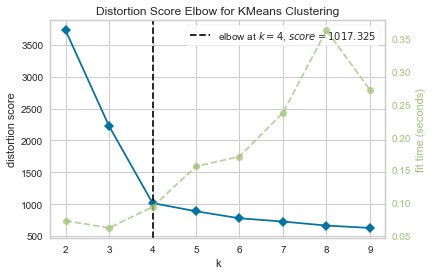

In [55]:
choose_k(PCA_df)

In [56]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7766718817223415


number of components = 15

In [57]:
PCA_df = choose_component(df_normalized,15)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170,-0.000916,0.000243,-1.737772e-04,-0.000020
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033,-0.001657,-0.000009,-9.105650e-08,0.000018
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037,0.000005,-0.000038,-3.375435e-06,-0.000011
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071,0.000099,0.000015,2.605757e-05,-0.000020
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066,-0.000761,0.000079,-1.266837e-04,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252,-0.000088,-0.000892,-1.512701e-04,0.000123
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219,-0.000130,-0.000726,-3.393878e-04,-0.000221
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170,-0.000178,-0.000761,-1.609073e-04,-0.000034
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100,0.002680,-0.000201,-6.564170e-04,0.000677


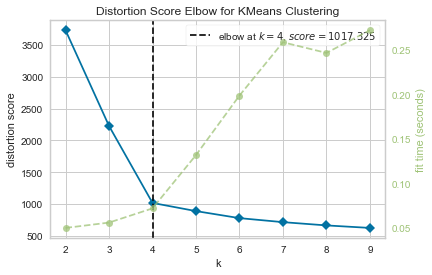

In [58]:
choose_k(PCA_df)

In [59]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.7736584546500453


number of components = 16

In [60]:
PCA_df = choose_component(df_normalized,16)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.473762,-0.264981,0.067259,0.141549,-0.016131,0.007692,0.006099,-0.046278,0.004342,-0.005704,-0.000170,-0.000916,0.000243,-1.737772e-04,-0.000020,-0.000036
1,1.610781,0.090535,0.246746,-0.084013,0.032208,0.104976,0.040736,-0.031152,-0.001528,0.001214,0.000033,-0.001657,-0.000009,-9.105650e-08,0.000018,-0.000004
2,-0.446314,-0.252821,-0.162733,-0.073995,-0.065377,0.022280,-0.049871,0.007962,-0.001298,0.001006,0.000037,0.000005,-0.000038,-3.375435e-06,-0.000011,0.000105
3,-0.469701,-0.280377,-0.097006,-0.134401,0.075321,-0.035273,-0.103892,0.016447,-0.002487,-0.000918,0.000071,0.000099,0.000015,2.605757e-05,-0.000020,-0.000052
4,0.569974,0.047788,-0.130629,0.061213,-0.305851,-0.083605,-0.048117,0.010576,0.002407,-0.002724,-0.000066,-0.000761,0.000079,-1.266837e-04,0.000036,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.501582,-0.117725,0.163109,0.102228,0.016359,-0.154063,0.135426,-0.013287,0.000266,-0.001260,-0.000252,-0.000088,-0.000892,-1.512701e-04,0.000123,-0.000006
8946,-0.492683,-0.083557,0.047386,0.232504,0.121250,-0.102007,0.106695,-0.101847,-0.001408,-0.000976,-0.000219,-0.000130,-0.000726,-3.393878e-04,-0.000221,-0.000007
8947,-0.484639,-0.330121,0.054732,0.093900,0.070348,-0.042608,0.049744,0.004876,0.002320,-0.000551,-0.000170,-0.000178,-0.000761,-1.609073e-04,-0.000034,-0.000005
8948,-0.451775,-0.362749,0.062341,0.093623,0.003195,0.134152,-0.038984,-0.018117,0.005586,-0.006565,-0.000100,0.002680,-0.000201,-6.564170e-04,0.000677,-0.000176


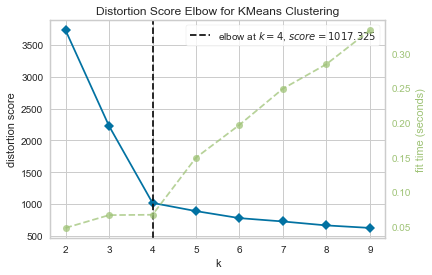

In [61]:
choose_k(PCA_df)

In [62]:
score_KMeans = Kmeans(PCA_df,4)
KMeans_Scores.append(score_KMeans)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.773782203980854


In [63]:
print(KMeans_Scores)

[0.8591612302980238, 0.8315262819645809, 0.8124726598881508, 0.7938140430816137, 0.7654740277341239, 0.7738085379003011, 0.773672104014118, 0.7738042496751316, 0.7786646372075574, 0.7737822826689598, 0.7786632007661533, 0.7766718817223415, 0.7736584546500453, 0.773782203980854]


In [64]:
KMeans_Scores_4 = []
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    score_KMeans = Kmeans(PCA_df,4)
    KMeans_Scores_4.append(score_KMeans)


In [65]:
KMeans_Scores_4

[0.8487784854230682,
 0.8333075079533353,
 0.8124726598881507,
 0.7903519383612686,
 0.7640679380164284,
 0.8195979067209275,
 0.8195881635663553,
 0.7786682961229812,
 0.7736597130481752,
 0.7766719393668766,
 0.7736584876092921,
 0.7737986615768445,
 0.7737822089387765,
 0.773658449691971]

---------------------------------------------------------
### 3) hirarecal without PCA

In [66]:
def choose_k_hirarecal(df_normalized):
    model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df_normalized)        
    visualizer.show()

In [67]:
def hirarecal(df_normalized,k):
    hac = AgglomerativeClustering(k)
    hac.fit(df_normalized)
    df_normalized["hac"] = hac.labels_
    score_hac = silhouette_score(df_normalized, df_normalized["hac"], metric='euclidean')
    return score_hac

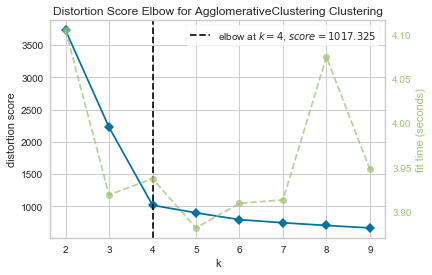

In [68]:
choose_k_hirarecal(df_normalized)

In [69]:
score_hirarecal = hirarecal(df_normalized,4)
score_hirarecal

0.7346273356264754


### 4) hirarecal with PCA

In [70]:
hirarecal_score=[]

- number of components = 3

In [71]:
PCA_df = choose_component(df_normalized,3)
PCA_df

,0,1,2
0,0.689837,0.003338,-0.268101
1,-1.464258,0.879580,0.066767
2,0.662771,-0.047362,-0.246825
3,0.682488,-0.034348,-0.277595
4,-1.481814,-0.633620,0.068155
...,...,...,...
8945,0.713342,0.021173,-0.124908
8946,0.702893,-0.009482,-0.085869
8947,0.697399,-0.004815,-0.332946
8948,0.674916,0.019911,-0.366290


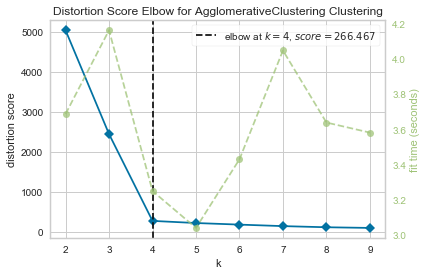

In [72]:
choose_k_hirarecal(PCA_df)

In [73]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.9092409848041579

- number of components = 4

In [74]:
PCA_df = choose_component(df_normalized,4)
PCA_df

,0,1,2,3
0,0.689837,0.003338,-0.268101,0.122395
1,-1.464258,0.879580,0.066767,-0.036718
2,0.662771,-0.047362,-0.246825,-0.146669
3,0.682488,-0.034348,-0.277595,-0.186816
4,-1.481814,-0.633620,0.068155,0.212319
...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227
8946,0.702893,-0.009482,-0.085869,0.136042
8947,0.697399,-0.004815,-0.332946,0.056264
8948,0.674916,0.019911,-0.366290,0.062190


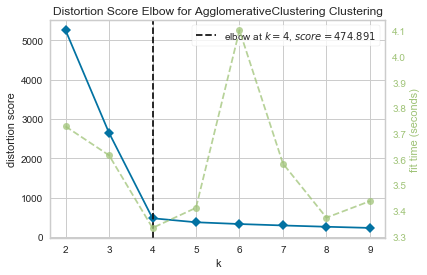

In [75]:
choose_k_hirarecal(PCA_df)

In [76]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.8509185169930568

- number of components = 5

In [77]:
PCA_df = choose_component(df_normalized,5)
PCA_df

,0,1,2,3,4
0,0.689837,0.003338,-0.268101,0.122395,0.074810
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202
...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917
8948,0.674916,0.019911,-0.366290,0.062190,0.073442


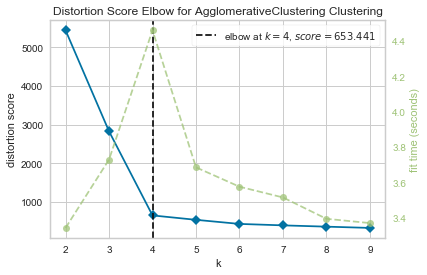

In [78]:
choose_k_hirarecal(PCA_df)

In [79]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.8281593094211064

- number of components = 6

In [80]:
PCA_df = choose_component(df_normalized,6)
PCA_df

,0,1,2,3,4,5
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780
...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139


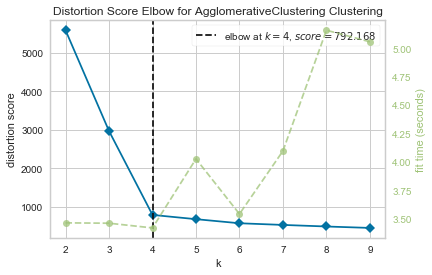

In [81]:
choose_k_hirarecal(PCA_df)

In [82]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.805165986315413

- number of components = 7

In [83]:
PCA_df = choose_component(df_normalized,7)
PCA_df

,0,1,2,3,4,5,6
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959
...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298


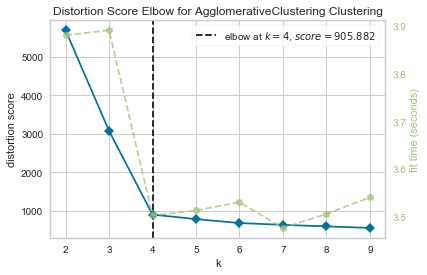

In [84]:
choose_k_hirarecal(PCA_df)

In [85]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7904318597772656

- number of components = 8

In [86]:
PCA_df = choose_component(df_normalized,8)
PCA_df

,0,1,2,3,4,5,6,7
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870
...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097


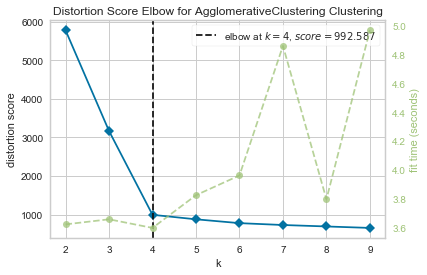

In [87]:
choose_k_hirarecal(PCA_df)

In [88]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7782148564733454

- number of components = 9

In [89]:
PCA_df = choose_component(df_normalized,9)
PCA_df

,0,1,2,3,4,5,6,7,8
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081
...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141


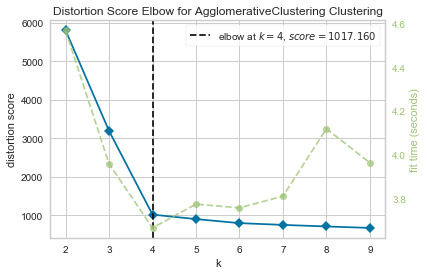

In [90]:
choose_k_hirarecal(PCA_df)

In [91]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751838914165303

- number of components = 10

In [92]:
PCA_df = choose_component(df_normalized,10)
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500
...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580


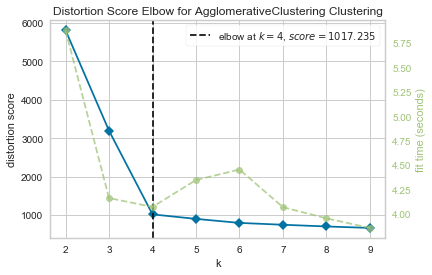

In [93]:
choose_k_hirarecal(PCA_df)

In [94]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751719657496662

- number of components = 11

In [95]:
PCA_df = choose_component(df_normalized,11)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745
...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570


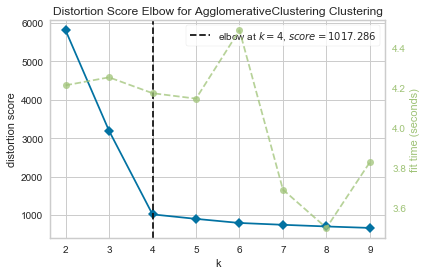

In [96]:
choose_k_hirarecal(PCA_df)

In [97]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.775164261386007

- number of components = 12

In [98]:
PCA_df = choose_component(df_normalized,12)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703,-0.000169
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219,0.000035
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040,0.000053
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900,0.000079
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269,-0.000257
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973,-0.000218
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551,-0.000170
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570,-0.000102


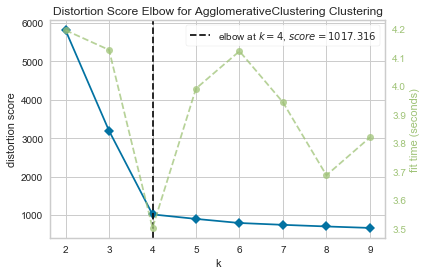

In [99]:
choose_k_hirarecal(PCA_df)

In [100]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751600787820528

- number of components = 13

In [101]:
PCA_df = choose_component(df_normalized,13)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703,-0.000169,-0.000912
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219,0.000035,-0.001650
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040,0.000053,0.000062
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900,0.000079,0.000127
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745,-0.000075,-0.000795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269,-0.000257,-0.000104
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973,-0.000218,-0.000126
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551,-0.000170,-0.000176
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570,-0.000102,0.002677


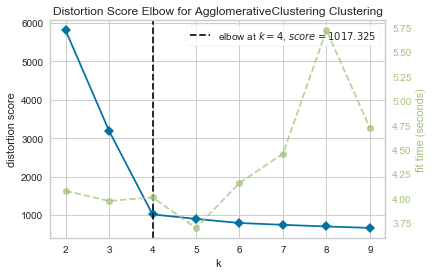

In [102]:
choose_k_hirarecal(PCA_df)

In [103]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751588137178728

- number of components = 14

In [104]:
PCA_df = choose_component(df_normalized,14)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703,-0.000169,-0.000912,0.000243
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219,0.000035,-0.001650,-0.000009
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040,0.000053,0.000062,-0.000039
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900,0.000079,0.000127,0.000014
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745,-0.000075,-0.000795,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269,-0.000257,-0.000104,-0.000892
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973,-0.000218,-0.000126,-0.000726
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551,-0.000170,-0.000176,-0.000761
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570,-0.000102,0.002677,-0.000201


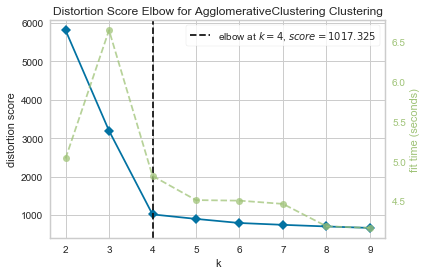

In [105]:
choose_k_hirarecal(PCA_df)

In [106]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751587765757915

- number of components = 15

In [107]:
PCA_df = choose_component(df_normalized,15)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703,-0.000169,-0.000912,0.000243,-1.700726e-04
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219,0.000035,-0.001650,-0.000009,-4.851669e-07
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040,0.000053,0.000062,-0.000039,1.338634e-05
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900,0.000079,0.000127,0.000014,3.557933e-05
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745,-0.000075,-0.000795,0.000080,-1.392692e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269,-0.000257,-0.000104,-0.000892,-1.661624e-04
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973,-0.000218,-0.000126,-0.000726,-3.151829e-04
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551,-0.000170,-0.000176,-0.000761,-1.559328e-04
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570,-0.000102,0.002677,-0.000201,-7.177462e-04


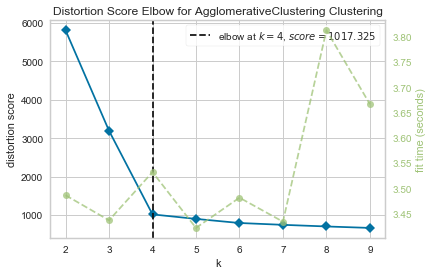

In [108]:
choose_k_hirarecal(PCA_df)

In [109]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751587618395425

- number of components = 16

In [110]:
PCA_df = choose_component(df_normalized,16)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.689837,0.003338,-0.268101,0.122395,0.074810,0.032588,0.014555,-0.033663,-0.044518,0.004313,-0.005703,-0.000169,-0.000912,0.000243,-1.700726e-04,-0.000036
1,-1.464258,0.879580,0.066767,-0.036718,-0.029112,0.065473,0.007834,0.069038,-0.030936,-0.001547,0.001219,0.000035,-0.001650,-0.000009,-4.851669e-07,0.000019
2,0.662771,-0.047362,-0.246825,-0.146669,-0.040641,0.076378,-0.020400,-0.145845,0.016821,-0.001465,0.001040,0.000053,0.000062,-0.000039,1.338634e-05,-0.000003
3,0.682488,-0.034348,-0.277595,-0.186816,-0.009168,-0.061521,-0.092810,-0.062206,0.020278,-0.002566,-0.000900,0.000079,0.000127,0.000014,3.557933e-05,-0.000013
4,-1.481814,-0.633620,0.068155,0.212319,-0.215202,0.020780,-0.007959,-0.063870,0.007081,0.002500,-0.002745,-0.000075,-0.000795,0.000080,-1.392692e-04,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.713342,0.021173,-0.124908,0.164227,0.028854,-0.140138,0.150407,0.028475,-0.015570,0.000311,-0.001269,-0.000257,-0.000104,-0.000892,-1.661624e-04,0.000106
8946,0.702893,-0.009482,-0.085869,0.136042,0.222792,-0.091061,0.123772,-0.023651,-0.100280,-0.001418,-0.000973,-0.000218,-0.000126,-0.000726,-3.151829e-04,-0.000252
8947,0.697399,-0.004815,-0.332946,0.056264,0.101917,-0.047977,0.052853,0.004457,0.005200,0.002310,-0.000551,-0.000170,-0.000176,-0.000761,-1.559328e-04,-0.000048
8948,0.674916,0.019911,-0.366290,0.062190,0.073442,0.124139,-0.060298,0.022097,-0.018141,0.005580,-0.006570,-0.000102,0.002677,-0.000201,-7.177462e-04,0.000612


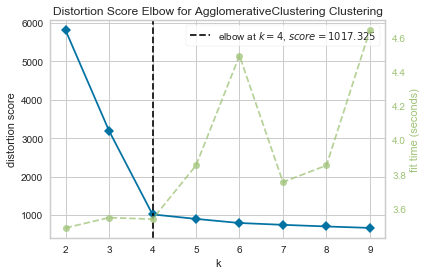

In [111]:
choose_k_hirarecal(PCA_df)

In [112]:
score_hirarecal = hirarecal(PCA_df,4)
hirarecal_score.append(score_hirarecal)
score_hirarecal

0.7751587469119582

In [113]:
hirarecal_score

[0.9092409848041579,
 0.8509185169930568,
 0.8281593094211064,
 0.805165986315413,
 0.7904318597772656,
 0.7782148564733454,
 0.7751838914165303,
 0.7751719657496662,
 0.775164261386007,
 0.7751600787820528,
 0.7751588137178728,
 0.7751587765757915,
 0.7751587618395425,
 0.7751587469119582]

------------------------------------
### 5) DBSCAN without PCA

In [114]:
def choose_epsilon(df_normalized):
    nearest_neighbors = NearestNeighbors(n_neighbors=11)
    neighbors = nearest_neighbors.fit(df_normalized)
    distances, indices = neighbors.kneighbors(df_normalized)
    distances = np.sort(distances[:,10], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    return(distances[knee.knee])
    

In [115]:
def DBScan(df_normalized,epsilon,min_sample):
    clustering = DBSCAN(eps=epsilon, min_samples=min_sample).fit(df_normalized)
    df_normalized["dbs"] = clustering.labels_
    df_normalized["dbs"].unique()
    labels =df_normalized["dbs"]
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    score_DBSCAN = silhouette_score(df_normalized, df_normalized["dbs"], metric='euclidean')
    return n_clusters , n_noise , score_DBSCAN
   

0.16247460878552417

<Figure size 360x360 with 0 Axes>

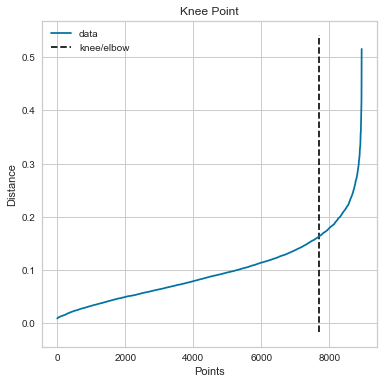

In [116]:
epsilon = choose_epsilon(df_normalized)
epsilon

In [117]:
n_clusters , n_noise , score_DBSCAN = DBScan(df_normalized,epsilon,10)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 8
number of noise 583
DBSCAN cluster score : 0.7474970710332978


### 6) DBSCAN with PCA

In [118]:
no_cluster = []
no_noise = []
DBSCAN_Scores = []

- number of components = 3

In [119]:
PCA_df = choose_component(df_normalized,3)
PCA_df

,0,1,2
0,0.830410,-0.952782,-0.145804
1,-1.433562,-0.344180,0.866419
2,0.801826,-0.940349,-0.186783
3,0.821774,-0.941484,-0.176726
4,-1.609368,0.818490,-0.514098
...,...,...,...
8945,0.852066,-0.934961,-0.109656
8946,0.841464,-0.933966,-0.139875
8947,0.838405,-0.956289,-0.160491
8948,0.816901,-0.966354,-0.140447


0.01758908505092345

<Figure size 360x360 with 0 Axes>

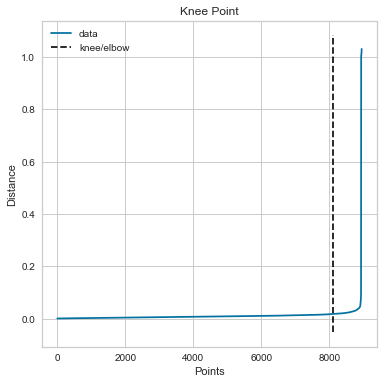

In [120]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [121]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 9
number of noise 620
DBSCAN cluster score : 0.8974238261035614


- number of components = 4

In [122]:
PCA_df = choose_component(df_normalized,4)
PCA_df

,0,1,2,3
0,0.830410,-0.952782,-0.145804,-0.124567
1,-1.433562,-0.344180,0.866419,-0.019551
2,0.801826,-0.940349,-0.186783,-0.136776
3,0.821774,-0.941484,-0.176726,-0.172553
4,-1.609368,0.818490,-0.514098,0.021640
...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954
8946,0.841464,-0.933966,-0.139875,0.072367
8947,0.838405,-0.956289,-0.160491,-0.192987
8948,0.816901,-0.966354,-0.140447,-0.226886


0.03782326998278981

<Figure size 360x360 with 0 Axes>

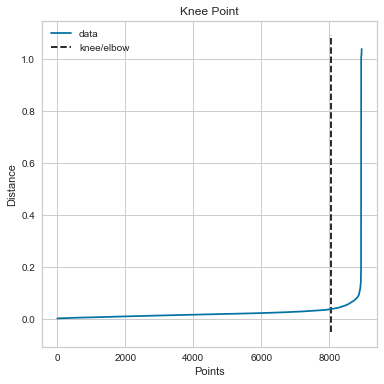

In [123]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [124]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 7
number of noise 697
DBSCAN cluster score : 0.8428837191440325


- number of components = 5

In [125]:
PCA_df = choose_component(df_normalized,5)
PCA_df

,0,1,2,3,4
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952
4,-1.609368,0.818490,-0.514098,0.021640,0.255661
...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130


0.07236538483621349

<Figure size 360x360 with 0 Axes>

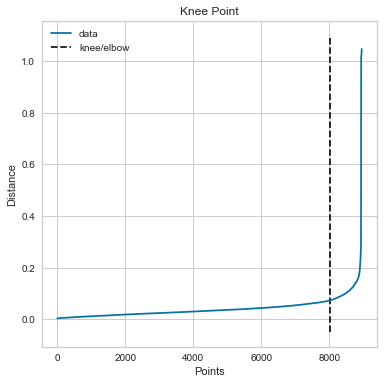

In [126]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [127]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 9
number of noise 710
DBSCAN cluster score : 0.8171440224639485


- number of components = 6

In [128]:
PCA_df = choose_component(df_normalized,6)
PCA_df

,0,1,2,3,4,5
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203
...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787


0.0971793495095785

<Figure size 360x360 with 0 Axes>

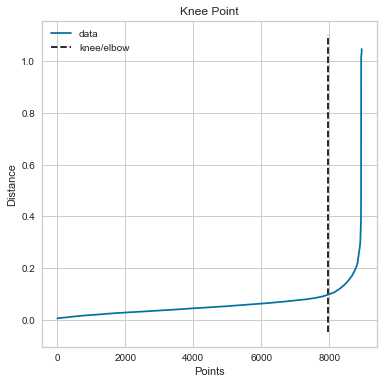

In [129]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [130]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 7
number of noise 720
DBSCAN cluster score : 0.8082264460107057


- number of components = 7

In [131]:
PCA_df = choose_component(df_normalized,7)
PCA_df

,0,1,2,3,4,5,6
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552
...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822


0.12627381248390163

<Figure size 360x360 with 0 Axes>

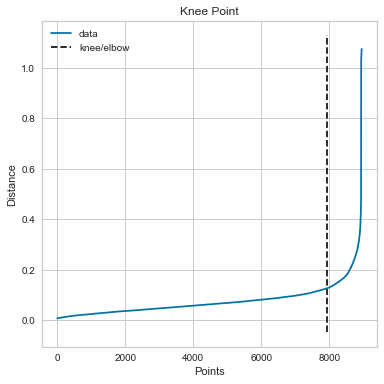

In [132]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [133]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 7
number of noise 725
DBSCAN cluster score : 0.7926354844499082


- number of components = 8

In [134]:
PCA_df = choose_component(df_normalized,8)
PCA_df

,0,1,2,3,4,5,6,7
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176
...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683


0.15060194860719264

<Figure size 360x360 with 0 Axes>

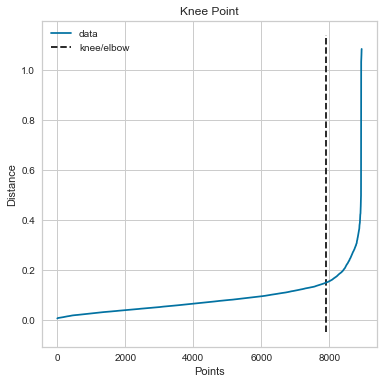

In [135]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [136]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 7
number of noise 699
DBSCAN cluster score : 0.7871979435248372


- number of components = 9

In [137]:
PCA_df = choose_component(df_normalized,9)
PCA_df

,0,1,2,3,4,5,6,7,8
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346
...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350


0.16874959426653843

<Figure size 360x360 with 0 Axes>

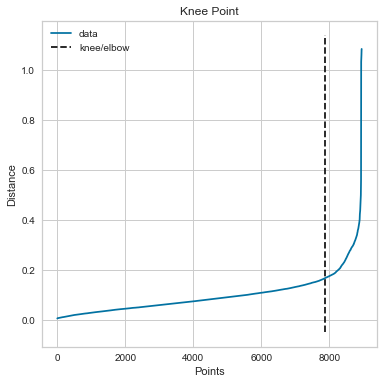

In [138]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [139]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 647
DBSCAN cluster score : 0.778030020378948


- number of components = 10

In [140]:
PCA_df = choose_component(df_normalized,10)
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521
...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225


0.1729402921427194

<Figure size 360x360 with 0 Axes>

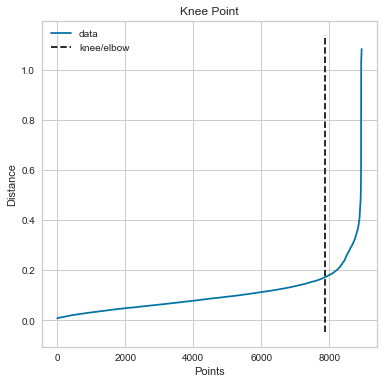

In [141]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [142]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742626707400903


- number of components = 11

In [143]:
PCA_df = choose_component(df_normalized,11)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527
...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620


0.17301298979759738

<Figure size 360x360 with 0 Axes>

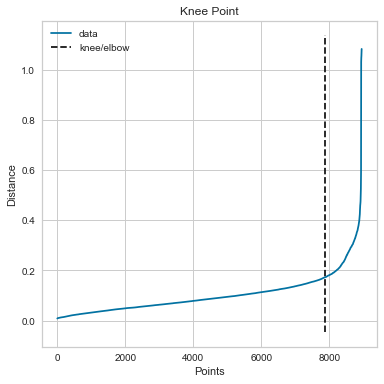

In [144]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [145]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742542920726536


- number of components = 12

In [146]:
PCA_df = choose_component(df_normalized,12)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345,-0.005675
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517,0.001286
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534,0.000903
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629,-0.001050
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527,-0.002706
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273,-0.001357
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404,-0.000962
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304,-0.000557
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620,-0.006530


0.1730629092932374

<Figure size 360x360 with 0 Axes>

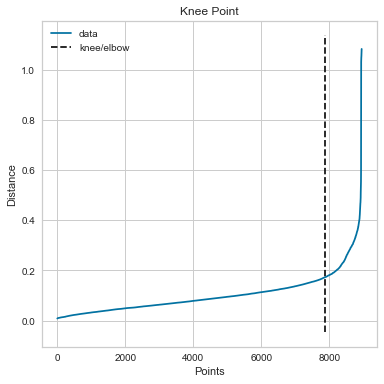

In [147]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [148]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742489060924802


- number of components = 13

In [149]:
PCA_df = choose_component(df_normalized,13)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345,-0.005675,-0.000161
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517,0.001286,0.000022
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534,0.000903,0.000072
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629,-0.001050,0.000103
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527,-0.002706,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273,-0.001357,-0.000241
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404,-0.000962,-0.000218
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304,-0.000557,-0.000167
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620,-0.006530,-0.000093


0.17306291520241715

<Figure size 360x360 with 0 Axes>

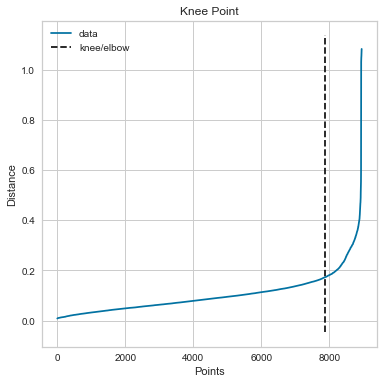

In [150]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [151]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742459635129784


- number of components = 14

In [152]:
PCA_df = choose_component(df_normalized,14)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345,-0.005675,-0.000161,-0.000918
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517,0.001286,0.000022,-0.001626
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534,0.000903,0.000072,0.000021
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629,-0.001050,0.000103,0.000079
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527,-0.002706,-0.000076,-0.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273,-0.001357,-0.000241,-0.000135
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404,-0.000962,-0.000218,-0.000122
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304,-0.000557,-0.000167,-0.000181
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620,-0.006530,-0.000093,0.002674


0.17306291917681646

<Figure size 360x360 with 0 Axes>

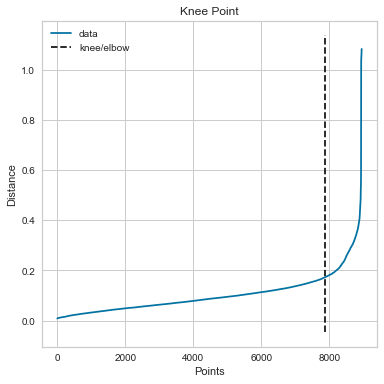

In [153]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [154]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742449049297073


- number of components = 15

In [155]:
PCA_df = choose_component(df_normalized,15)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345,-0.005675,-0.000161,-0.000918,0.000243
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517,0.001286,0.000022,-0.001626,-0.000008
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534,0.000903,0.000072,0.000021,-0.000041
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629,-0.001050,0.000103,0.000079,0.000013
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527,-0.002706,-0.000076,-0.000791,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273,-0.001357,-0.000241,-0.000135,-0.000893
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404,-0.000962,-0.000218,-0.000122,-0.000727
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304,-0.000557,-0.000167,-0.000181,-0.000762
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620,-0.006530,-0.000093,0.002674,-0.000201


0.17306295511045489

<Figure size 360x360 with 0 Axes>

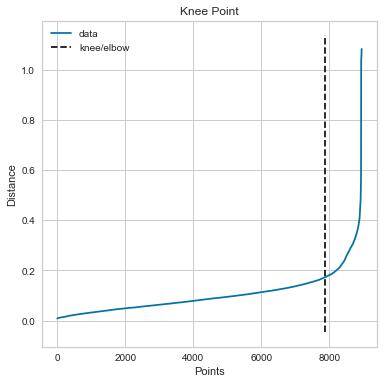

In [156]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [157]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742448786834403


- number of components = 16

In [158]:
PCA_df = choose_component(df_normalized,16)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.830410,-0.952782,-0.145804,-0.124567,0.098493,0.074878,0.042197,0.015636,-0.034238,-0.043676,0.004345,-0.005675,-0.000161,-0.000918,0.000243,-0.000169
1,-1.433562,-0.344180,0.866419,-0.019551,-0.023523,-0.027418,0.065319,0.009041,0.067858,-0.034094,-0.001517,0.001286,0.000022,-0.001626,-0.000008,-0.000002
2,0.801826,-0.940349,-0.186783,-0.136776,-0.143058,-0.097766,0.054742,-0.023060,-0.142494,0.024449,-0.001534,0.000903,0.000072,0.000021,-0.000041,0.000015
3,0.821774,-0.941484,-0.176726,-0.172553,-0.182952,-0.046871,-0.075586,-0.096014,-0.058306,0.028521,-0.002629,-0.001050,0.000103,0.000079,0.000013,0.000038
4,-1.609368,0.818490,-0.514098,0.021640,0.255661,-0.158203,0.004552,-0.009176,-0.063346,0.005521,0.002527,-0.002706,-0.000076,-0.000791,0.000080,-0.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.852066,-0.934961,-0.109656,0.006954,0.144136,0.048010,-0.139485,0.148557,0.030381,-0.009345,0.000273,-0.001357,-0.000241,-0.000135,-0.000893,-0.000168
8946,0.841464,-0.933966,-0.139875,0.072367,0.071599,0.212192,-0.068433,0.124601,-0.024037,-0.098137,-0.001404,-0.000962,-0.000218,-0.000122,-0.000727,-0.000307
8947,0.838405,-0.956289,-0.160491,-0.192987,0.034501,0.110013,-0.033447,0.053874,0.003411,0.005469,0.002304,-0.000557,-0.000167,-0.000181,-0.000762,-0.000154
8948,0.816901,-0.966354,-0.140447,-0.226886,0.045130,0.063787,0.135822,-0.057683,0.020350,-0.019225,0.005620,-0.006530,-0.000093,0.002674,-0.000201,-0.000738


0.17306296275022792

<Figure size 360x360 with 0 Axes>

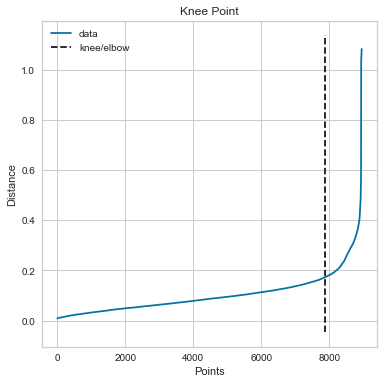

In [159]:
epsilon = choose_epsilon(PCA_df)
epsilon

In [160]:
n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,15)

no_cluster.append(n_clusters)
no_noise.append(n_noise)
DBSCAN_Scores.append(score_DBSCAN)

print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 6
number of noise 659
DBSCAN cluster score : 0.7742448678343741


at number of components = 3
number of clusters 10
number of noise 456
DBSCAN cluster score : 0.9189773018717363
                                                  
at number of components = 4
number of clusters 10
number of noise 561
DBSCAN cluster score : 0.8599217884388218
                                                  
at number of components = 5
number of clusters 13
number of noise 535
DBSCAN cluster score : 0.836723870419565
                                                  
at number of components = 6
number of clusters 10
number of noise 607
DBSCAN cluster score : 0.8226271912531624
                                                  
at number of components = 7
number of clusters 9
number of noise 620
DBSCAN cluster score : 0.8079350123068123
                                                  
at number of components = 8
number of clusters 9
number of noise 594
DBSCAN cluster score : 0.7969921051657394
                                                  
at number of components =

<Figure size 360x360 with 0 Axes>

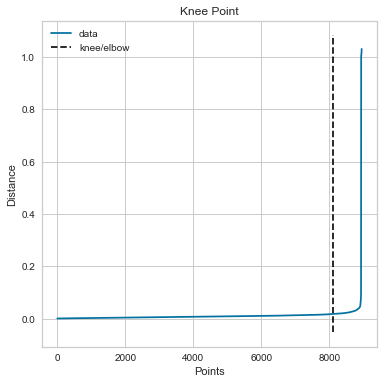

<Figure size 360x360 with 0 Axes>

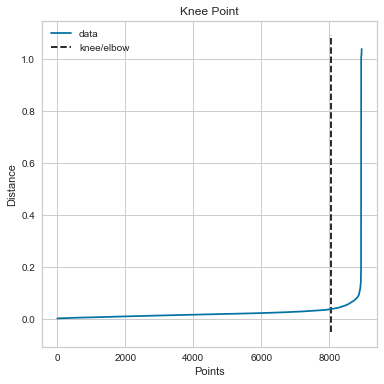

<Figure size 360x360 with 0 Axes>

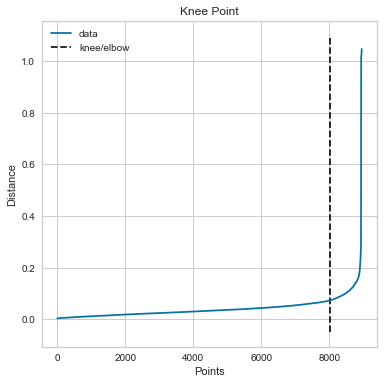

<Figure size 360x360 with 0 Axes>

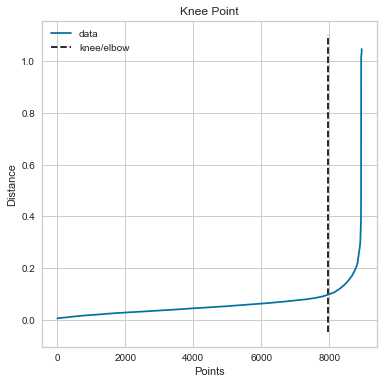

<Figure size 360x360 with 0 Axes>

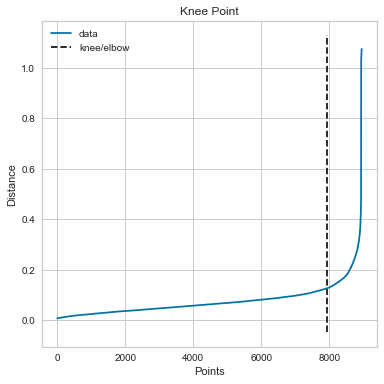

<Figure size 360x360 with 0 Axes>

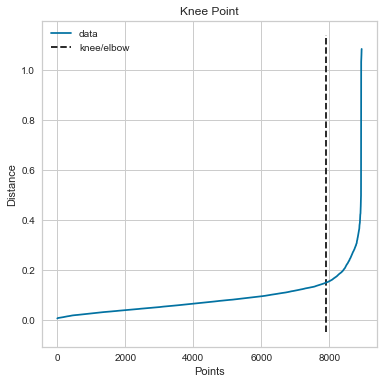

<Figure size 360x360 with 0 Axes>

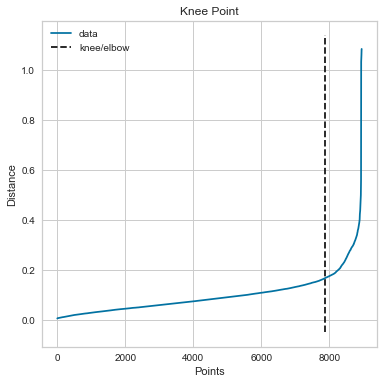

<Figure size 360x360 with 0 Axes>

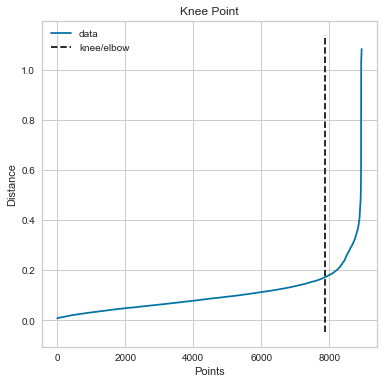

<Figure size 360x360 with 0 Axes>

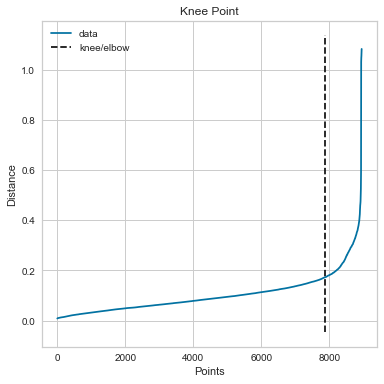

<Figure size 360x360 with 0 Axes>

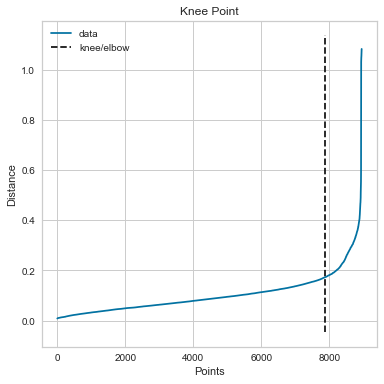

<Figure size 360x360 with 0 Axes>

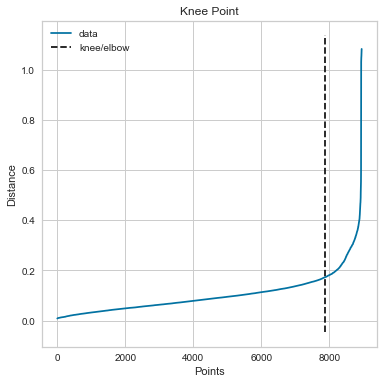

<Figure size 360x360 with 0 Axes>

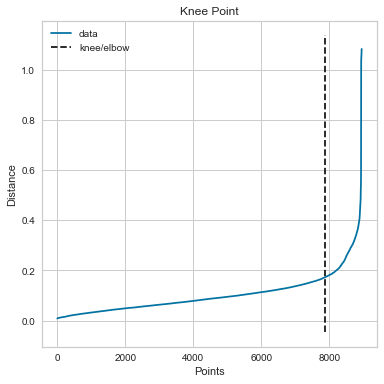

<Figure size 360x360 with 0 Axes>

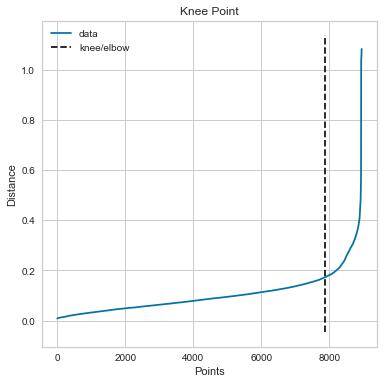

<Figure size 360x360 with 0 Axes>

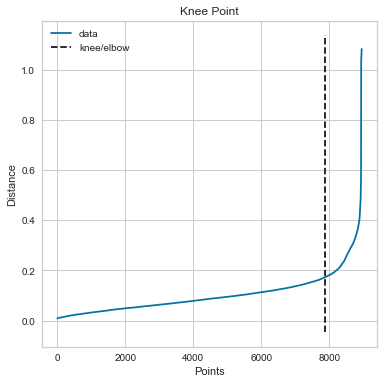

In [161]:
DBSCAN_Scores_loop_10 = []
no_cluster_loop_10 = []
no_noise_loop_10 =[]

for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    epsilon = choose_epsilon(PCA_df)
    n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,10)
    no_cluster_loop_10.append(n_clusters)
    no_noise_loop_10.append(n_noise)
    DBSCAN_Scores_loop_10.append(score_DBSCAN)
    print("="*50)
    print(f"at number of components = {i}")
    print(f"number of clusters {n_clusters}")
    print(f"number of noise {n_noise}")
    print(f"DBSCAN cluster score : {score_DBSCAN}")
    print(" "*50)

at number of components = 3
number of clusters 8
number of noise 822
DBSCAN cluster score : 0.8675233064816625
                                                  
at number of components = 4
number of clusters 5
number of noise 821
DBSCAN cluster score : 0.8330349068130153
                                                  
at number of components = 5
number of clusters 5
number of noise 968
DBSCAN cluster score : 0.7826987004631186
                                                  
at number of components = 6
number of clusters 7
number of noise 819
DBSCAN cluster score : 0.7876727359941808
                                                  
at number of components = 7
number of clusters 7
number of noise 820
DBSCAN cluster score : 0.7709292514135299
                                                  
at number of components = 8
number of clusters 7
number of noise 823
DBSCAN cluster score : 0.7708359828239383
                                                  
at number of components = 9


<Figure size 360x360 with 0 Axes>

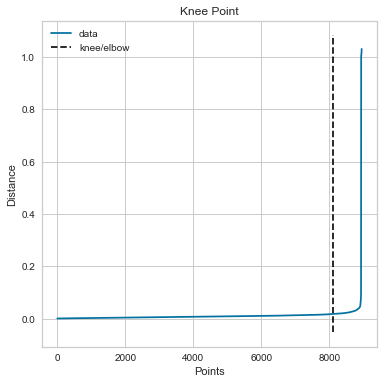

<Figure size 360x360 with 0 Axes>

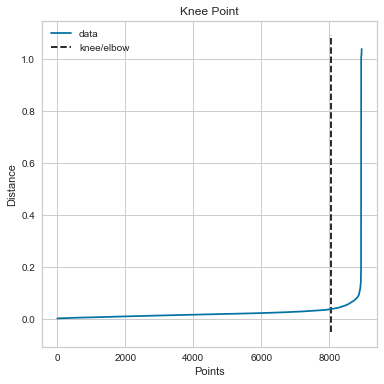

<Figure size 360x360 with 0 Axes>

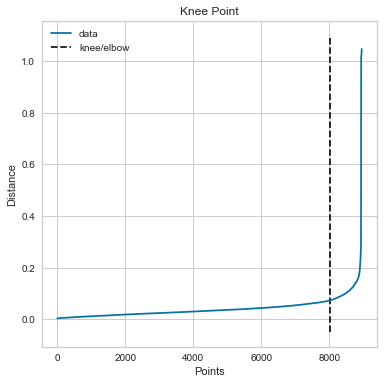

<Figure size 360x360 with 0 Axes>

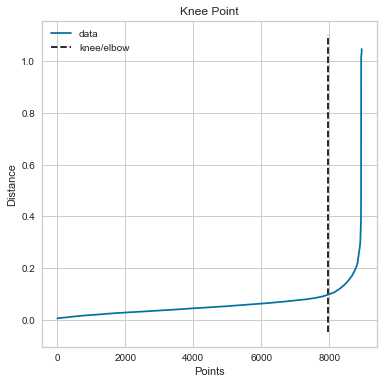

<Figure size 360x360 with 0 Axes>

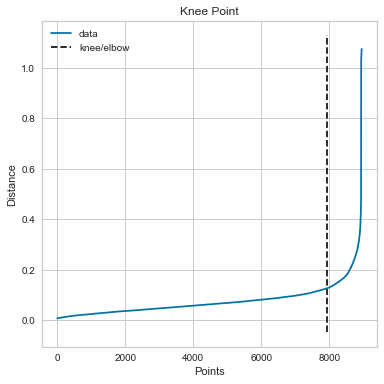

<Figure size 360x360 with 0 Axes>

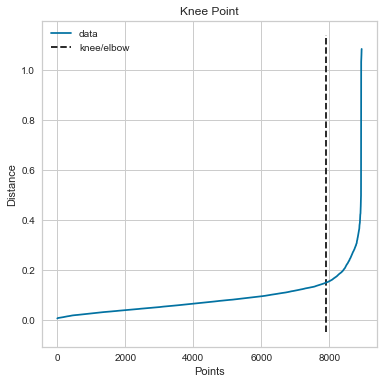

<Figure size 360x360 with 0 Axes>

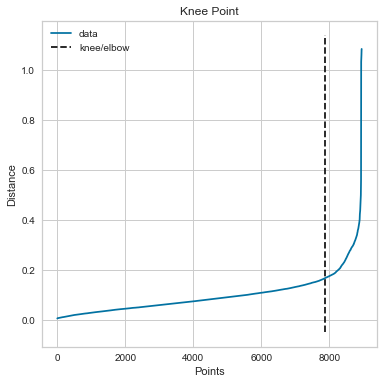

<Figure size 360x360 with 0 Axes>

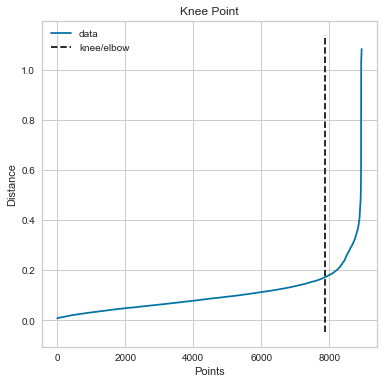

<Figure size 360x360 with 0 Axes>

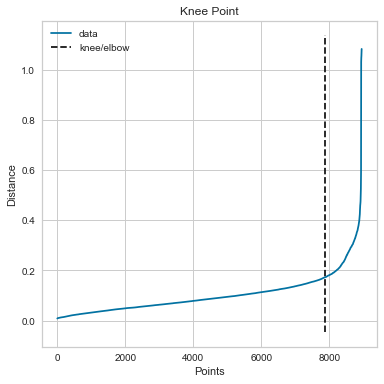

<Figure size 360x360 with 0 Axes>

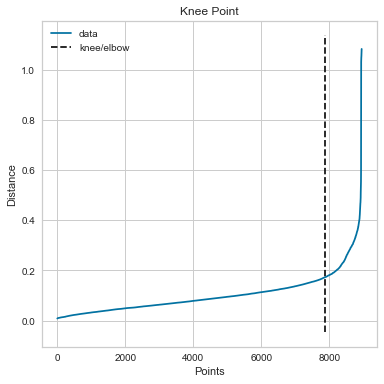

<Figure size 360x360 with 0 Axes>

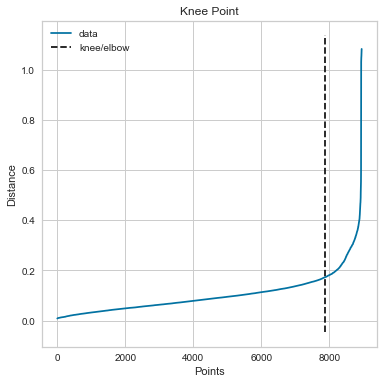

<Figure size 360x360 with 0 Axes>

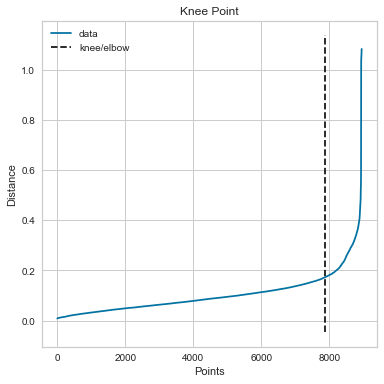

<Figure size 360x360 with 0 Axes>

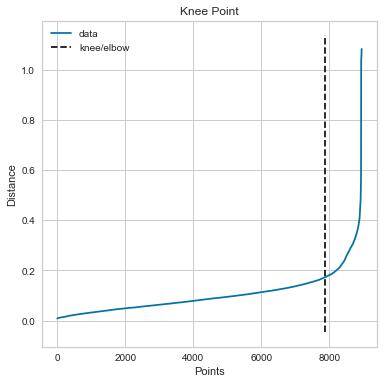

<Figure size 360x360 with 0 Axes>

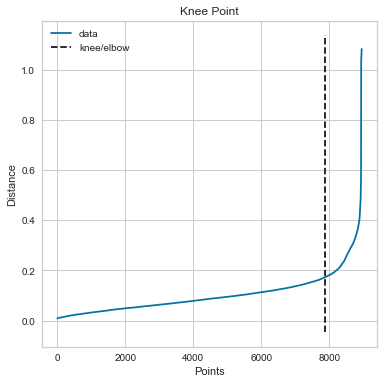

In [162]:
DBSCAN_Scores_loop_20 = []
no_cluster_loop_20 = []
no_noise_loop_20 = []

for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    epsilon = choose_epsilon(PCA_df)
    n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,20)
    no_cluster_loop_20.append(n_clusters)
    no_noise_loop_20.append(n_noise)
    DBSCAN_Scores_loop_20.append(score_DBSCAN)
    print("="*50)
    print(f"at number of components = {i}")
    print(f"number of clusters {n_clusters}")
    print(f"number of noise {n_noise}")
    print(f"DBSCAN cluster score : {score_DBSCAN}")
    print(" "*50)

-----------------------------------
### 7) Gaussian without PCA

In [163]:
def Gaussian(df_normalized,k):
    gm = GaussianMixture(k)
    gm.fit(df_normalized)
    df_normalized["gm"] = gm.predict(df_normalized)
    score_Gaussian = silhouette_score(df_normalized, df_normalized["gm"], metric='euclidean')
    return score_Gaussian


In [164]:
Score_Gaussian = []
for i in range(2,10):
    Score_Gaussian.append(Gaussian(df_normalized,i))

In [165]:
Score_Gaussian

[0.5480660885802097,
 0.715631425764762,
 0.819135104923797,
 0.8102804421132053,
 0.8450387372384041,
 0.8569528103615622,
 0.858253778021268,
 0.8399054377265258]

-----------------------------------
### 8) Gaussian with PCA

- number of components = 3

In [166]:
PCA_df = choose_component(df_normalized,3)
PCA_df

,0,1,2
0,0.379551,0.678294,-1.022100
1,0.778053,-1.534150,0.327351
2,0.369973,0.652199,-1.009226
3,0.372091,0.671800,-1.013884
4,-1.616222,-1.370759,0.346768
...,...,...,...
8945,0.380938,0.701582,-0.998578
8946,2.157996,0.552767,-0.128338
8947,0.378394,0.686133,-1.032079
8948,0.381157,0.663171,-1.036386


In [167]:
Score_Gaussian_3 = []
for i in range(2,12):
    Score_Gaussian_3.append(Gaussian(PCA_df,i))
Score_Gaussian_3

[0.6044987781541531,
 0.587572212299096,
 0.7848532967270435,
 0.9058167819243457,
 0.9326378125307317,
 0.9534961459443799,
 0.9741032100433776,
 0.9794810875100401,
 0.9843678525610146,
 0.9846725041729971]

- number of components = 4

In [168]:
PCA_df = choose_component(df_normalized,4)
PCA_df

,0,1,2,3
0,0.379551,0.678294,-1.022100,0.037115
1,0.778053,-1.534150,0.327351,-0.771157
2,0.369973,0.652199,-1.009226,0.083616
3,0.372091,0.671800,-1.013884,0.068927
4,-1.616222,-1.370759,0.346768,0.465398
...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621
8946,2.157996,0.552767,-0.128338,0.257994
8947,0.378394,0.686133,-1.032079,0.043792
8948,0.381157,0.663171,-1.036386,0.022719


In [169]:
Score_Gaussian_4 = []
for i in range(2,12):
    Score_Gaussian_4.append(Gaussian(PCA_df,i))
Score_Gaussian_4

[0.48281785387259757,
 0.5718040199167358,
 0.714734844011836,
 0.8989940273989392,
 0.918681888079648,
 0.9538592139325871,
 0.9543800521729061,
 0.9750326220072449,
 0.9774985626960007,
 0.97837105226218]

- number of components = 5

In [170]:
PCA_df = choose_component(df_normalized,5)
PCA_df

,0,1,2,3,4
0,0.379551,0.678294,-1.022100,0.037115,-0.069465
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854
2,0.369973,0.652199,-1.009226,0.083616,-0.114983
3,0.372091,0.671800,-1.013884,0.068927,-0.147022
4,-1.616222,-1.370759,0.346768,0.465398,0.020760
...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511


In [171]:
Score_Gaussian_5 = []
for i in range(2,12):
    Score_Gaussian_5.append(Gaussian(PCA_df,i))
Score_Gaussian_5

[0.4976019544742689,
 0.5266359320063523,
 0.7675934031998844,
 0.8649652932271601,
 0.8766112319694929,
 0.9091230600549532,
 0.9252970128070093,
 0.9361953496746186,
 0.9452127646103573,
 0.9382898532436001]

- number of components = 6

In [172]:
PCA_df = choose_component(df_normalized,6)
PCA_df

,0,1,2,3,4,5
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755
...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733


In [173]:
Score_Gaussian_6 = []
for i in range(2,12):
    Score_Gaussian_6.append(Gaussian(PCA_df,i))
Score_Gaussian_6

[0.4884181184437226,
 0.5408880486968195,
 0.7540080143371395,
 0.8524915482047571,
 0.8798817125027776,
 0.8864762580632457,
 0.9085085072084231,
 0.9107507124685718,
 0.9211715736735777,
 0.9232986563929745]

- number of components = 7

In [174]:
PCA_df = choose_component(df_normalized,7)
PCA_df

,0,1,2,3,4,5,6
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208
...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420


In [175]:
Score_Gaussian_7 = []
for i in range(2,12):
    Score_Gaussian_7.append(Gaussian(PCA_df,i))
Score_Gaussian_7

[0.5393523801317263,
 0.600766689193857,
 0.7345711349019823,
 0.8016057407692037,
 0.848369052805289,
 0.8745277132271594,
 0.9024033274965223,
 0.9027624235226835,
 0.9086086228138469,
 0.9055173085922934]

- number of components = 8

In [176]:
PCA_df = choose_component(df_normalized,8)
PCA_df

,0,1,2,3,4,5,6,7
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260
...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595


In [177]:
Score_Gaussian_8 = []
for i in range(2,12):
    Score_Gaussian_8.append(Gaussian(PCA_df,i))
Score_Gaussian_8

[0.4846567279946881,
 0.6240735615305396,
 0.6902250955167768,
 0.8383787862019895,
 0.846455430748428,
 0.8747358585261058,
 0.8740046559274032,
 0.8866126004707909,
 0.8970073124267081,
 0.8963577877009352]

- number of components = 9

In [178]:
PCA_df = choose_component(df_normalized,9)
PCA_df

,0,1,2,3,4,5,6,7,8
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927
...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425


In [179]:
Score_Gaussian_9 = []
for i in range(2,12):
    Score_Gaussian_9.append(Gaussian(PCA_df,i))
Score_Gaussian_9

[0.48138100088223956,
 0.5871711699767777,
 0.712785452810467,
 0.7834321716551046,
 0.836882065006325,
 0.8564679314785442,
 0.8662504493195583,
 0.8816243330319966,
 0.8705736588273661,
 0.8945454839358045]

- number of components = 10

In [180]:
PCA_df = choose_component(df_normalized,10)
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723
...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494


In [181]:
Score_Gaussian_10 = []
for i in range(2,12):
    Score_Gaussian_10.append(Gaussian(PCA_df,i))
Score_Gaussian_10

[0.5342235532490873,
 0.5533184012018406,
 0.6729989029221822,
 0.829179962511025,
 0.8291566704169644,
 0.8431292633955932,
 0.8731504413917809,
 0.8692646042169837,
 0.875585547434653,
 0.816452924458209]

- number of components = 11

In [182]:
PCA_df = choose_component(df_normalized,11)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426
...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956


In [183]:
Score_Gaussian_11 = []
for i in range(2,12):
    Score_Gaussian_11.append(Gaussian(PCA_df,i))
Score_Gaussian_11

[0.5336139276790035,
 0.5536401388607392,
 0.724379058004133,
 0.7629086900574479,
 0.8427179843639147,
 0.8513749757116333,
 0.8764004284795254,
 0.8690880377344031,
 0.8864787758288931,
 0.8915715312770663]

- number of components = 12

In [184]:
PCA_df = choose_component(df_normalized,12)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037,0.004363
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492,-0.001502
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873,-0.001514
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671,-0.002615
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426,0.002522
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091,0.000287
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150,-0.001469
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304,0.002299
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956,0.005636


In [185]:
Score_Gaussian_12 = []
for i in range(2,12):
    Score_Gaussian_12.append(Gaussian(PCA_df,i))
Score_Gaussian_12

[0.4426905889625762,
 0.5843465964305784,
 0.7243741503464768,
 0.7533706352155122,
 0.8390533482563274,
 0.8395056100937895,
 0.8616300102576189,
 0.8555244833400388,
 0.8719511340206804,
 0.8727828478936687]

- number of components = 13

In [186]:
PCA_df = choose_component(df_normalized,13)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037,0.004363,-0.005662
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492,-0.001502,0.001296
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873,-0.001514,0.000916
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671,-0.002615,-0.001043
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426,0.002522,-0.002709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091,0.000287,-0.001348
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150,-0.001469,-0.001010
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304,0.002299,-0.000559
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956,0.005636,-0.006518


In [187]:
Score_Gaussian_13 = []
for i in range(2,12):
    Score_Gaussian_13.append(Gaussian(PCA_df,i))
Score_Gaussian_13

[0.5300645355199625,
 0.5523800364127553,
 0.7043192477384719,
 0.8197575534220244,
 0.8300006812017013,
 0.8506257030058852,
 0.8422570562461773,
 0.8835694657197335,
 0.869253722106759,
 0.8733670818843272]

- number of components = 14

In [188]:
PCA_df = choose_component(df_normalized,14)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037,0.004363,-0.005662,-0.000159
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492,-0.001502,0.001296,0.000027
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873,-0.001514,0.000916,0.000078
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671,-0.002615,-0.001043,0.000106
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426,0.002522,-0.002709,-0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091,0.000287,-0.001348,-0.000238
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150,-0.001469,-0.001010,-0.000237
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304,0.002299,-0.000559,-0.000169
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956,0.005636,-0.006518,-0.000092


In [189]:
Score_Gaussian_14 = []
for i in range(2,12):
    Score_Gaussian_14.append(Gaussian(PCA_df,i))
Score_Gaussian_14

[0.4791005203627756,
 0.5819992291623229,
 0.6778346797816321,
 0.8267492523306682,
 0.8310752051387919,
 0.8543203212340021,
 0.8496703768267361,
 0.8663246822570104,
 0.8579685289991795,
 0.876589558378468]

- number of components = 15

In [190]:
PCA_df = choose_component(df_normalized,15)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037,0.004363,-0.005662,-0.000159,-0.000912
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492,-0.001502,0.001296,0.000027,-0.001617
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873,-0.001514,0.000916,0.000078,0.000031
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671,-0.002615,-0.001043,0.000106,0.000085
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426,0.002522,-0.002709,-0.000078,-0.000795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091,0.000287,-0.001348,-0.000238,-0.000128
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150,-0.001469,-0.001010,-0.000237,-0.000158
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304,0.002299,-0.000559,-0.000169,-0.000184
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956,0.005636,-0.006518,-0.000092,0.002678


In [191]:
Score_Gaussian_15 = []
for i in range(2,12):
    Score_Gaussian_15.append(Gaussian(PCA_df,i))
Score_Gaussian_15

[0.4426882127099496,
 0.5240277900410405,
 0.6952961379650299,
 0.7489593417314512,
 0.8483592544559391,
 0.8391567120312519,
 0.8631287206329682,
 0.8583932011921954,
 0.8659583823621215,
 0.8658883950741028]

- number of components = 16

In [192]:
PCA_df = choose_component(df_normalized,16)
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.379551,0.678294,-1.022100,0.037115,-0.069465,0.091120,0.082417,0.033884,0.015649,-0.034723,-0.044037,0.004363,-0.005662,-0.000159,-0.000912,0.000244
1,0.778053,-1.534150,0.327351,-0.771157,-0.002854,-0.019866,-0.022539,0.068521,0.006658,0.069561,-0.035492,-0.001502,0.001296,0.000027,-0.001617,-0.000007
2,0.369973,0.652199,-1.009226,0.083616,-0.114983,-0.133158,-0.104263,0.073502,-0.030968,-0.137476,0.021873,-0.001514,0.000916,0.000078,0.000031,-0.000039
3,0.372091,0.671800,-1.013884,0.068927,-0.147022,-0.178000,-0.066111,-0.064414,-0.097759,-0.055318,0.026671,-0.002615,-0.001043,0.000106,0.000085,0.000014
4,-1.616222,-1.370759,0.346768,0.465398,0.020760,0.266755,-0.138208,0.009260,-0.009927,-0.063723,0.006426,0.002522,-0.002709,-0.000078,-0.000795,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.380938,0.701582,-0.998578,0.013621,0.073551,0.119335,0.030989,-0.135903,0.152749,0.027776,-0.010091,0.000287,-0.001348,-0.000238,-0.000128,-0.000891
8946,2.157996,0.552767,-0.128338,0.257994,-0.003638,0.070287,0.222729,-0.102319,0.137260,-0.036453,-0.089150,-0.001469,-0.001010,-0.000237,-0.000158,-0.000734
8947,0.378394,0.686133,-1.032079,0.043792,-0.138386,0.026896,0.108007,-0.043855,0.057485,0.000702,0.006304,0.002299,-0.000559,-0.000169,-0.000184,-0.000762
8948,0.381157,0.663171,-1.036386,0.022719,-0.179511,0.051733,0.084420,0.122595,-0.059425,0.021494,-0.019956,0.005636,-0.006518,-0.000092,0.002678,-0.000198


In [193]:
Score_Gaussian_16 = []
for i in range(2,12):
    Score_Gaussian_16.append(Gaussian(PCA_df,i))
Score_Gaussian_16

[0.4411319776393389,
 0.5843428917849091,
 0.6635220641481643,
 0.8278470552796304,
 0.8299986220249623,
 0.8444070413633753,
 0.8573480307585518,
 0.8791181739392707,
 0.873372408880522,
 0.8869802186517087]

In [194]:
Gaussian_Scores = []
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    Gaussian_Scores.append(Gaussian(PCA_df,6))
    

In [195]:
Gaussian_Scores

[0.9352988638654275,
 0.9197326063101405,
 0.8806085744632006,
 0.8663505836231432,
 0.8653135211833834,
 0.8620969956877578,
 0.8349727588825929,
 0.8442895574528314,
 0.8459175121856727,
 0.8384579224852969,
 0.8357136644510698,
 0.8434738419297148,
 0.833496131685908,
 0.8269263407506918]

## Print All Scores :-

In [196]:
KMeans_Scores


[0.8591612302980238,
 0.8315262819645809,
 0.8124726598881508,
 0.7938140430816137,
 0.7654740277341239,
 0.7738085379003011,
 0.773672104014118,
 0.7738042496751316,
 0.7786646372075574,
 0.7737822826689598,
 0.7786632007661533,
 0.7766718817223415,
 0.7736584546500453,
 0.773782203980854]

KMeans with 3 number of components

In [197]:
hirarecal_score

[0.9092409848041579,
 0.8509185169930568,
 0.8281593094211064,
 0.805165986315413,
 0.7904318597772656,
 0.7782148564733454,
 0.7751838914165303,
 0.7751719657496662,
 0.775164261386007,
 0.7751600787820528,
 0.7751588137178728,
 0.7751587765757915,
 0.7751587618395425,
 0.7751587469119582]

Hirarecal with 3 number of components

In [198]:
DBSCAN_Scores_loop_10

[0.9189773018717363,
 0.8599217884388218,
 0.836723870419565,
 0.8226271912531624,
 0.8079350123068123,
 0.7969921051657394,
 0.789601840387241,
 0.7872816404041482,
 0.7872729629795187,
 0.7872674066814903,
 0.7872643890562895,
 0.7872633204391085,
 0.7872632930559889,
 0.7872632817908245]

DBSCAN with 10 min samples and 3 number of components

In [199]:
DBSCAN_Scores

[0.8974238261035614,
 0.8428837191440325,
 0.8171440224639485,
 0.8082264460107057,
 0.7926354844499082,
 0.7871979435248372,
 0.778030020378948,
 0.7742626707400903,
 0.7742542920726536,
 0.7742489060924802,
 0.7742459635129784,
 0.7742449049297073,
 0.7742448786834403,
 0.7742448678343741]

DBSCAN with 15 min samples and 3 number of components

In [200]:
DBSCAN_Scores_loop_20

[0.8675233064816625,
 0.8330349068130153,
 0.7826987004631186,
 0.7876727359941808,
 0.7709292514135299,
 0.7708359828239383,
 0.7697828234812516,
 0.7668361296574128,
 0.7669700492822723,
 0.7668334468462712,
 0.7668305374301443,
 0.7668294714093176,
 0.766829446002288,
 0.76682943541383]

DBSCAN with 20 min samples and 3 number of components

In [202]:
Gaussian_Scores

[0.9352988638654275,
 0.9197326063101405,
 0.8806085744632006,
 0.8663505836231432,
 0.8653135211833834,
 0.8620969956877578,
 0.8349727588825929,
 0.8442895574528314,
 0.8459175121856727,
 0.8384579224852969,
 0.8357136644510698,
 0.8434738419297148,
 0.833496131685908,
 0.8269263407506918]

Gaussian with 6 clusters and 3 number of components

### The highest silhouette score 0.935 by Gaussian by 3 components